In [1]:
from sklearn import metrics
import numpy as np
import sympy
from sympy.matrices import Matrix
import pandas as pd
import matplotlib.pyplot as plt


# 3-class

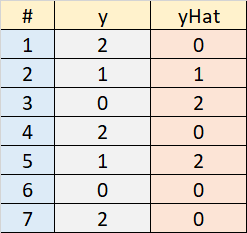

In [2]:
x = np.array([[2, 0],
              [1, 1],
              [0, 2],
              [2, 0],
              [1, 2],
              [0, 0],
              [2, 0]])

df = pd.DataFrame(x, columns = ['y','yHat'])
df

,y,yHat
0,2,0
1,1,1
2,0,2
3,2,0
4,1,2
5,0,0
6,2,0


In [3]:
print(metrics.classification_report(df['y'], df['yHat']))

              precision    recall  f1-score   support

           0       0.25      0.50      0.33         2
           1       1.00      0.50      0.67         2
           2       0.00      0.00      0.00         3

    accuracy                           0.29         7
   macro avg       0.42      0.33      0.33         7
weighted avg       0.36      0.29      0.29         7



In [4]:
metrics.precision_score( df['y'], df['yHat'], average=None)

array([0.25, 1.  , 0.  ])

In [5]:
metrics.precision_score( df['y'], df['yHat'], average="micro")

0.2857142857142857

In [6]:
metrics.precision_score(df['y'], df['yHat'], average="macro")

0.4166666666666667

In [7]:
metrics.precision_score(df['y'], df['yHat'], average="weighted")

0.35714285714285715

In [8]:
metrics.recall_score( df['y'], df['yHat'], average="micro")

0.2857142857142857

In [9]:
metrics.recall_score(df['y'], df['yHat'], average="macro")

0.3333333333333333

In [10]:
metrics.recall_score(df['y'], df['yHat'], average="weighted")

0.2857142857142857

In [11]:
metrics.f1_score( df['y'], df['yHat'], average="micro")

0.2857142857142857

In [12]:
metrics.f1_score(df['y'], df['yHat'], average="macro")

0.3333333333333333

In [13]:
metrics.f1_score(df['y'], df['yHat'], average="weighted")

0.2857142857142857

In [14]:
metrics.accuracy_score(df['y'], df['yHat'])

0.2857142857142857

In [15]:
pd.crosstab(index=df['y'], columns=df['yHat'], margins=True)

yHat,0,1,2,All
y,,,,
0,1,0,1,2
1,0,1,1,2
2,3,0,0,3
All,4,1,2,7


In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df['y'], df['yHat'])

In [17]:
confusion_matrix( df['yHat'],df['y'],)

array([[1, 0, 3],
       [0, 1, 0],
       [1, 1, 0]])

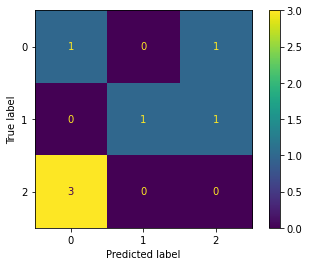

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm, display_labels=[0,1,2]).plot()

In [19]:
from sklearn.metrics import multilabel_confusion_matrix
mcm = multilabel_confusion_matrix(df['y'], df['yHat'], labels=[0, 1, 2])
mcm

array([[[2, 3],
        [1, 1]],

       [[5, 0],
        [1, 1]],

       [[2, 2],
        [3, 0]]])

In [20]:
multilabel_confusion_matrix(df['y'], df['yHat'])

array([[[2, 3],
        [1, 1]],

       [[5, 0],
        [1, 1]],

       [[2, 2],
        [3, 0]]])

In [21]:
#ConfusionMatrixDisplay(mcm, display_labels=[0,1,2]).plot()



# how to plot it
# https://stackoverflow.com/questions/62722416/plot-confusion-matrix-for-multilabel-classifcation-python

In [22]:
from math import sqrt

def factorize_2d(value):
  res = []
  for x in range(1, int(sqrt(value)+1)):
    if not (value % x):
      res.append([x,value//x])
  return res

factorize_2d(24)

[[1, 24], [2, 12], [3, 8], [4, 6]]

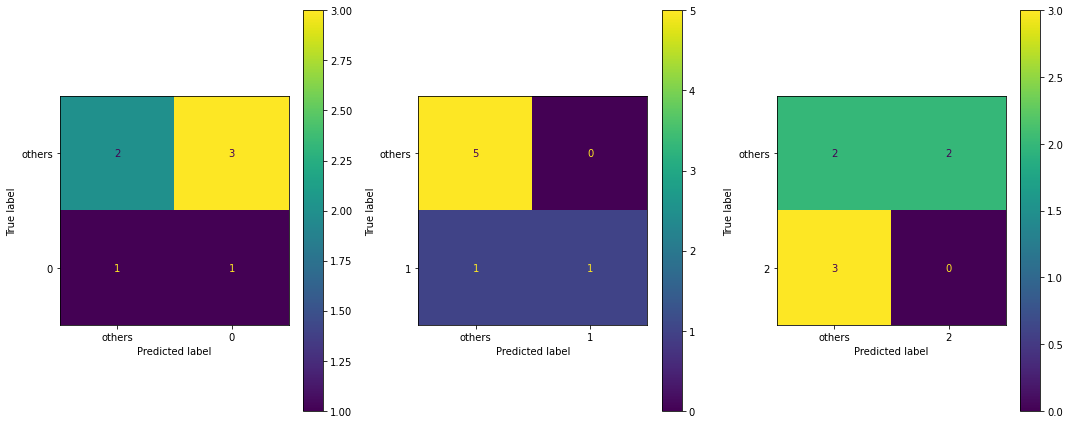

In [23]:

def plot_mcm(mcm):
  n_classes = len(mcm)
  maybe_shapes = factorize_2d(n_classes)
  shape = maybe_shapes[0]
  for s in maybe_shapes:
    if (s[0] + s[1]) < (shape[0] + shape[1]):
      shape = s
  #proportions = 5*np.array(shape)
  proportions = (15, 6)
  fig, axes = plt.subplots(*shape, figsize=proportions)
  if shape[0] != 1 and shape[1] != 1:
    axes = [item for sublist in axes for item in sublist]
  for matrix, ax, i_class in zip(mcm, axes, range(n_classes)):
    ConfusionMatrixDisplay(matrix, display_labels=["others", i_class]).plot(ax=ax)
  
  plt.tight_layout()
  plt.show()

plot_mcm(mcm)

#More classes

In [24]:
num_classes = 3
y_true = np.random.randint(0, num_classes, 10)
y_pred = np.random.randint(0, num_classes, 10)
df = pd.DataFrame(data={"y_true": y_true, "y_pred": y_pred})
df.transpose()

,0,1,2,3,4,5,6,7,8,9
y_true,0,1,1,1,1,2,1,1,0,1
y_pred,1,1,0,1,2,2,1,1,2,0


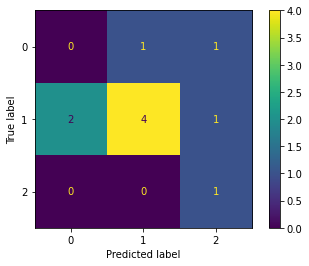

In [25]:
cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(cm, display_labels=range(num_classes)).plot()

In [26]:
mcm = multilabel_confusion_matrix(y_true, y_pred)

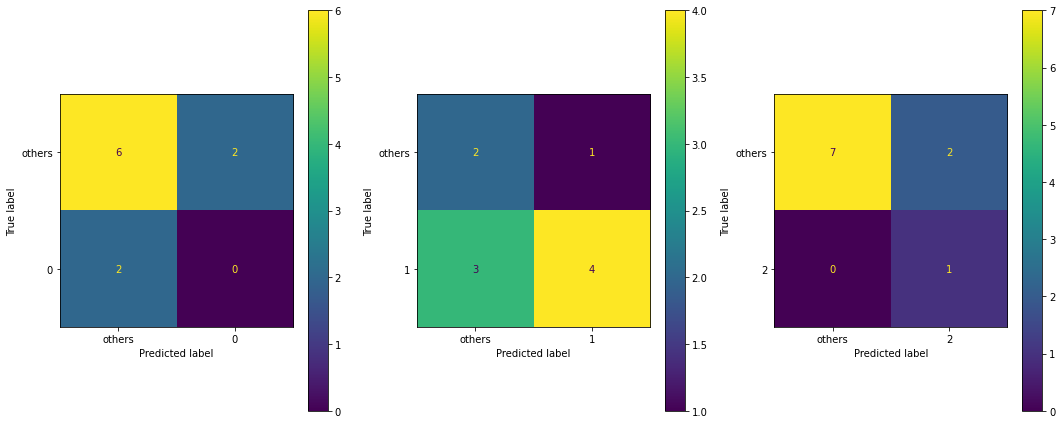

In [27]:
plot_mcm(mcm)

In [28]:
print(metrics.classification_report( y_true, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.80      0.57      0.67         7
           2       0.33      1.00      0.50         1

    accuracy                           0.50        10
   macro avg       0.38      0.52      0.39        10
weighted avg       0.59      0.50      0.52        10

